In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from software.preprocessing.video_data.DLC.Reconstruction import dlt_reconstruct
from software.preprocessing.Scripts.reconstruction_analysis import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import signal
from scipy import stats
import shutil, os
from PIL import Image
from errno import EEXIST, ENOENT

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.sqrt(np.average((y_true - y_pred) ** 2, axis=0))

In [4]:
windows = np.linspace(0, 10, 40)

prediction_csvs = {}

prediction_csvs['rm10'] = ['/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_C1_RM10DLC_resnet101_LabLabelOct27shuffle1_500000.csv', '/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam2_RM10DLC_resnet101_LabLabelOct27shuffle1_500000.csv', '/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam3_RM10DLC_resnet101_LabLabelOct27shuffle1_500000.csv']

prediction_csvs['rm11'] = ['/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam1_RM11DLC_resnet101_LabLabelOct27shuffle1_500000.csv', '/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam2_RM11DLC_resnet101_LabLabelOct27shuffle1_500000.csv', '/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam3_RM11DLC_resnet101_LabLabelOct27shuffle1_500000.csv']

prediction_csvs['rm13'] = ['/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam1_RM13DLC_resnet101_LabLabelOct27shuffle1_500000.csv', '/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam2_RM13DLC_resnet101_LabLabelOct27shuffle1_500000.csv', '/Users/home/Documents/Bouchard/Brett Stuff/Resnet101_AllCam_GroundTruths/Split_90/ground_truths_cam3_RM13DLC_resnet101_LabLabelOct27shuffle1_500000.csv']

rm10_label_csvs = ['/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam1_RM10.csv', '/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam2_RM10.csv', '/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam3_RM10.csv']
rm11_label_csvs = ['/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam1_RM11.csv', '/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam2_RM11.csv', '/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam3_RM11.csv']
rm13_label_csvs = ['/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam1_RM13.csv', '/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam2_RM13.csv', '/Users/home/Documents/Bouchard/Brett Stuff/March Labels/CollectedData_Lab_cam3_RM13.csv']

In [5]:
dlt_coefs_file = '/Users/home/Documents/Bouchard/Brett Stuff/DeepLabCutCSVs/test_dlt.csv'
reconstructions = {}
data_dicts = {}
for windowlength in windows:
    rm10_data_dict = process_csv(prediction_csvs['rm10'], rm10_label_csvs, windowlength)
    rm11_data_dict = process_csv(prediction_csvs['rm11'], rm11_label_csvs, windowlength)
    rm13_data_dict = process_csv(prediction_csvs['rm13'], rm13_label_csvs, windowlength)
    rm10_reconstructions = get_reconstructions(rm10_data_dict, dlt_coefs_file)
    rm11_reconstructions = get_reconstructions(rm11_data_dict, dlt_coefs_file)
    rm13_reconstructions = get_reconstructions(rm13_data_dict, dlt_coefs_file)
    reconstructions[windowlength] = {'rm10':rm10_reconstructions, 'rm11':rm11_reconstructions, 'rm13':rm13_reconstructions}
    data_dicts[windowlength] = {'rm10':rm10_data_dict, 'rm11':rm11_data_dict, 'rm13':rm13_data_dict}

Not enough entries for Shoulder 1, discarding
Not enough entries for Forearm 1, discarding
Not enough entries for Wrist 1, discarding
Not enough entries for Palm 1, discarding
Not enough entries for Index Base 1, discarding
Not enough entries for Index Tip 1, discarding
Not enough entries for Middle Base 1, discarding
Not enough entries for Middle Tip 1, discarding
Not enough entries for Third Base 1, discarding
Not enough entries for Third tip 1, discarding
Not enough entries for Fourth Base 1, discarding
Not enough entries for Fourth tip 1, discarding
Not enough entries for Shoulder 1, discarding
Not enough entries for Forearm 1, discarding
Not enough entries for Wrist 1, discarding
Not enough entries for Palm 1, discarding
Not enough entries for Index Base 1, discarding
Not enough entries for Index Tip 1, discarding
Not enough entries for Middle Base 1, discarding
Not enough entries for Middle Tip 1, discarding
Not enough entries for Third Base 1, discarding
Not enough entries for T

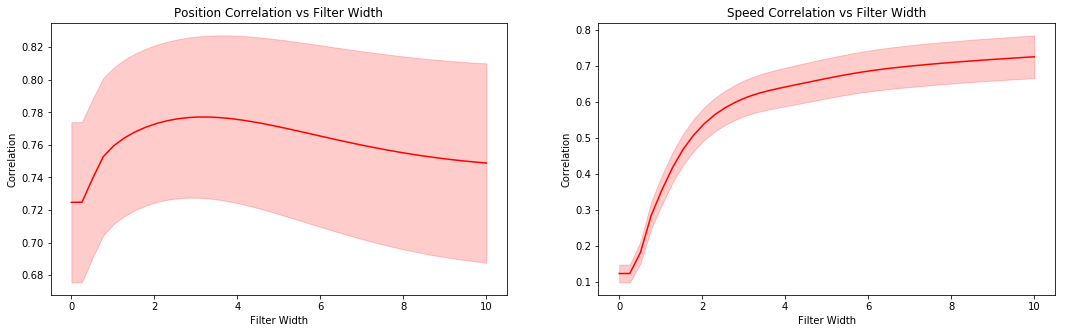

In [16]:
errors = {}
window_speed_corrs = {}
window_pos_corrs = {}
for window in windows:
    speed_corrs = []
    pos_corrs = []
    for rat, reconstruction in reconstructions[window].items():
        for name in reconstruction.keys():
            np.linalg.norm(reconstruction[name]["xyz_filtered_labelled"], axis=1)
            _, _, pos_corr, _, _ = stats.linregress(np.linalg.norm(reconstruction[name]["xyz_filtered_labelled"], axis=1), np.linalg.norm(reconstruction[name]["xyz_filtered_predicted_weighted"], axis=1))
            _, _, speed_corr, _, _ = stats.linregress(np.linalg.norm(np.diff(reconstruction[name]["xyz_filtered_labelled"], axis=0), axis=1), np.linalg.norm(np.diff(reconstruction[name]["xyz_filtered_predicted_weighted"], axis=0), axis=1))

            speed_corrs.append(speed_corr**2)
            pos_corrs.append(pos_corr**2)

    window_speed_corrs[window] = np.array(speed_corrs)
    window_pos_corrs[window] = np.array(pos_corrs)

window_speed_means = []
window_pos_means = []
window_speed_err = []
window_pos_err = []
for window in windows:
    window_speed_means.append(window_speed_corrs[window].mean())
    window_pos_means.append(window_pos_corrs[window].mean())
    window_speed_err.append(stats.sem(window_speed_corrs[window]))
    window_pos_err.append(stats.sem(window_pos_corrs[window]))

window_speed_means = np.array(window_speed_means)
window_pos_means = np.array(window_pos_means)
window_speed_err = np.array(window_speed_err)
window_pos_err = np.array(window_pos_err)

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(121)
ax.set_title("Position Correlation vs Filter Width")
ax.set_ylabel('Correlation')
ax.set_xlabel('Filter Width')
ax.plot(windows, window_pos_means, c='red')
ax.fill_between(windows, window_pos_means - window_pos_err, window_pos_means + window_pos_err, color='red', alpha=0.2)
ax = fig.add_subplot(122)
ax.set_title("Speed Correlation vs Filter Width")
ax.set_ylabel('Correlation')
ax.set_xlabel('Filter Width')
ax.plot(windows, window_speed_means, c='red')
ax.fill_between(windows, window_speed_means - window_speed_err, window_speed_means + window_speed_err, color='red', alpha=0.2)


In [15]:
import cv2

windowlength = windows[window_speed_means.argmax()]
for rat, reconstruction in reconstructions[windowlength].items():
    xmax_labelled, ymax_labelled, zmax_labelled = np.max([np.max(reconstruction[part]["xyz_filtered_labelled"], axis=0) for part in reconstruction.keys()], axis=0)
    xmin_labelled, ymin_labelled, zmin_labelled = np.min([np.min(reconstruction[part]["xyz_filtered_labelled"], axis=0) for part in reconstruction.keys()], axis=0)
    xmax_filtered_predicted_weighted, ymax_filtered_predicted_weighted, zmax_filtered_predicted_weighted = np.max([np.max(reconstruction[part]["xyz_filtered_predicted_weighted"], axis=0) for part in reconstruction.keys()], axis=0)
    xmin_filtered_predicted_weighted, ymin_filtered_predicted_weighted, zmin_filtered_predicted_weighted = np.min([np.min(reconstruction[part]["xyz_filtered_predicted_weighted"], axis=0) for part in reconstruction.keys()], axis=0)
    xmax = max(xmax_labelled, xmax_filtered_predicted_weighted)
    ymax = max(ymax_labelled, ymax_filtered_predicted_weighted)
    zmax = max(zmax_labelled, zmax_filtered_predicted_weighted)
    xmin = min(xmin_labelled, xmin_filtered_predicted_weighted)
    ymin = min(ymin_labelled, ymin_filtered_predicted_weighted)
    zmin = min(zmin_labelled, zmin_filtered_predicted_weighted)
    for name in reconstruction.keys():
        labelled_speed = np.linalg.norm(np.diff(reconstruction[name]["xyz_filtered_labelled"], axis=0), axis=1)*1000*140
        filtered_speed = np.linalg.norm(np.diff(reconstruction[name]["xyz_filtered_predicted_weighted"], axis=0), axis=1)*1000*140

        labelled_pos = np.linalg.norm(reconstruction[name]["xyz_filtered_labelled"], axis=1)*1000*140
        filtered_pos = np.linalg.norm(reconstruction[name]["xyz_filtered_predicted_weighted"], axis=1)*1000*140

        folder = 'Unmarked'
        video_dir = '/Users/home/Documents/Bouchard/Brett Stuff/videos/{}'.format(folder)
        cam1 = cv2.VideoCapture('{}/{}_cam1.mp4'.format(video_dir, rat))
        cam2 = cv2.VideoCapture('{}/{}_cam2.mp4'.format(video_dir, rat))
        cam3 = cv2.VideoCapture('{}/{}_cam3.mp4'.format(video_dir, rat))

        output_dir = 'speed_trace_{:.2f}/{}/{}_frames'.format(windowlength,rat, name)
        mkdir_p(output_dir)
        files = []
        for pos in range(len(labelled_speed)):
            fig = plt.figure(figsize=(24,10))
            fig.suptitle("{}, {}".format(rat, name))
            
            ax = fig.add_subplot(231)
            ax.plot(range(len(labelled_speed)), labelled_speed, label="Labelled Speed")
            ax.plot(range(len(filtered_speed)), filtered_speed, label="Predicted Speed")
            ax.scatter(pos, labelled_speed[pos])
            ax.scatter(pos, filtered_speed[pos])
            ax.set_xlabel("time")
            ax.set_ylabel("Speed")
            ax.legend()
            
            ax = fig.add_subplot(232)
            ax.plot(range(len(labelled_pos)), labelled_pos, label="Labelled Position")
            ax.plot(range(len(filtered_pos)), filtered_pos, label="Predicted Position")
            ax.scatter(pos, labelled_pos[pos])
            ax.scatter(pos, filtered_pos[pos])
            ax.set_xlabel("time")
            ax.set_ylabel("Position")
            ax.legend()
            
            ax = fig.add_subplot(233, projection='3d')
            ax.set_xlim(xmax, xmin)
            ax.set_ylim(ymax, ymin)
            ax.set_zlim(zmax, zmin)
            ax.scatter(*reconstruction[name]["xyz_filtered_labelled"][pos], label="Labelled")
            ax.scatter(*reconstruction[name]["xyz_filtered_predicted_weighted"][pos], label="Predicted")
            ax.legend()
            
            ax = fig.add_subplot(234)
            ret, frame = cam1.read()
            ax.imshow(frame)
            ax.scatter(data_dicts[windowlength][rat][name]["Camera 1"]["filtered_labelled_x"][pos], data_dicts[windowlength][rat][name]["Camera 1"]["filtered_labelled_y"][pos])
            ax.scatter(data_dicts[windowlength][rat][name]["Camera 1"]["filtered_predicted_x"][pos], data_dicts[windowlength][rat][name]["Camera 1"]["filtered_predicted_y"][pos])
            ax.axis('off')
            
            ax = fig.add_subplot(235)
            ret, frame = cam2.read()
            ax.imshow(frame)
            ax.scatter(data_dicts[windowlength][rat][name]["Camera 2"]["filtered_labelled_x"][pos], data_dicts[windowlength][rat][name]["Camera 2"]["filtered_labelled_y"][pos])
            ax.scatter(data_dicts[windowlength][rat][name]["Camera 2"]["filtered_predicted_x"][pos], data_dicts[windowlength][rat][name]["Camera 2"]["filtered_predicted_y"][pos])
            ax.axis('off')
            
            ax = fig.add_subplot(236)
            ret, frame = cam3.read()
            ax.imshow(frame)
            ax.scatter(data_dicts[windowlength][rat][name]["Camera 3"]["filtered_labelled_x"][pos], data_dicts[windowlength][rat][name]["Camera 3"]["filtered_labelled_y"][pos])
            ax.scatter(data_dicts[windowlength][rat][name]["Camera 3"]["filtered_predicted_x"][pos], data_dicts[windowlength][rat][name]["Camera 3"]["filtered_predicted_y"][pos])
            ax.axis('off')
            
            filename='{}/frame{}.png'.format(output_dir, pos)
            plt.savefig(filename, dpi=75)
            files.append(filename)
            plt.close()

        frame = cv2.imread(files[0])
        height, width, _ = frame.shape

        video = cv2.VideoWriter('speed_trace_{:.2f}/{}/{}.mp4'.format(windowlength, rat, name), cv2.VideoWriter_fourcc(*'MP4V'), 10, (width,height))

        for f in files:
            video.write(cv2.imread(f))

        cv2.destroyAllWindows()
        video.release()
        cam1.release()
        cam2.release()
        cam3.release()